### **This *'ipynb'* file shows the Data Visualizations of the 2019 Andhra Pradesh Elections**

In [1]:
# connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/AP elections

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/My Drive/AP elections'
/content


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/AP elections 2019/data 2.csv", encoding="windows-1252")

print(data.head())

# Handling missing values
data['age'].fillna(data['age'].mean(), inplace=True)

data['sex'].fillna(data['sex'].mode()[0], inplace=True)

data['category'].fillna(data['category'].mode()[0], inplace=True)

data['postal'].fillna(data['postal'].median(), inplace=True)

print(data.isnull().sum())

   year           state  ac_number      ac_name  \
0  2014  Andhra Pradesh          1  ICHCHAPURAM   
1  2014  Andhra Pradesh          1  ICHCHAPURAM   
2  2014  Andhra Pradesh          1  ICHCHAPURAM   
3  2014  Andhra Pradesh          1  ICHCHAPURAM   
4  2014  Andhra Pradesh          1  ICHCHAPURAM   

                  candidate_name     sex   age category party         symbol  \
0              GANAPA VANAJAKSHI  FEMALE  31.0  GENERAL   IND           Ring   
1                           NOTA     NaN   NaN      NaN  NOTA           NOTA   
2               ESWARA RAO KOLLI    MALE  50.0  GENERAL   INC           Hand   
3                    DASARI RAJU    MALE  42.0  GENERAL   JnP  Glass Tumbler   
4  JANNALA SURYAVARA PRASADA RAO    MALE  67.0  GENERAL   BJP          Lotus   

   general  postal  total  percentage_votes_polled  total_electors  
0      613     4.0    617                 0.357841          247941  
1     3872     8.0   3880                 2.250280          247941  
2    

<ipython-input-5-890bbb534514>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mean(), inplace=True)
<ipython-input-5-890bbb534514>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

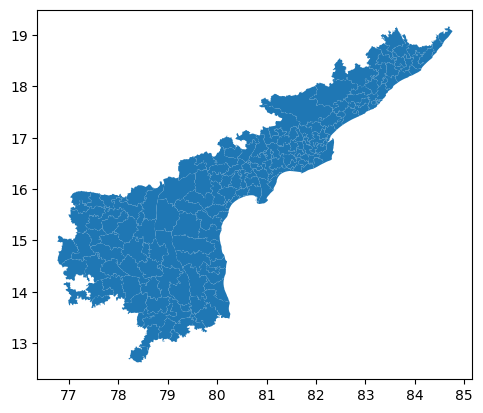

In [7]:
# Load the shapefile
shapefile_path = "/content/drive/MyDrive/AP elections 2019/ANDHRA PRADESH_ASSEMBLY.geojson"

andhra_map = gpd.read_file(shapefile_path)
andhra_map.plot()
plt.show()

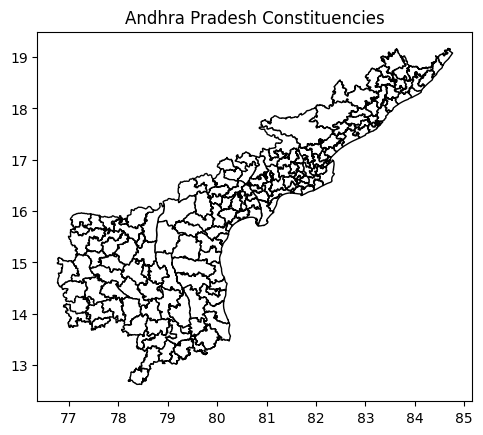

In [8]:
# Plot the map with added labels or additional styling
andhra_map.plot(edgecolor='black', color='white')
plt.title("Andhra Pradesh Constituencies")
plt.show()

In [9]:
# Load your dataset
file_path = "/content/drive/MyDrive/AP elections 2019/data 2.csv"
data = pd.read_csv(file_path, encoding="windows-1252")

# Create a dictionary for spelling corrections
spelling_corrections = {
    "Vizianagaram": "VIZIANAGARM",
    "Srungavarapukota": "SRUNGAVARAPUKOTA",
    "Bhimli": "BHIMILI",
    "Visakhapatnam East": "VISHAKAPATNAM EAST",
    "Visakhapatnam  West": "VISHAKAPATNAM WEST",
    "Visakhapatnam  North": "VISHAKAPATNAM NORTH",
    "Visakhapatnam South": "VISHAKAPATNAM SOUTH",
    "Gajuwaka": "GAJUWAKA",
    "Chodavaram": "CHODAVARM",
    "V.Madugula": "MADUGULA",
    "Araku valley": "ARAKU VALLEY (ST)",
    "Paderu": "PADERU (ST)",
    "Anakapalli": "ANAKAPALLE",
    "Pendurthi": "PENDURTHI",
    "ELAMANCHILI": "YELAMANCHILI",
    "PAYAKARAOPETA": "PAYAKARAOPET (SC)",
    "Narsipatnam": "NARSIPATNAM",
    "Tuni": "TUNI",
    "Prathipadu": "PRATHIPADU",
    "Pithapuram": "PITHAPURAM",
    "Kakinada Rural": "KAKINADA RURAL",
    "Peddapuram": "PEDDAPURAM",
    "Anaparthy": "ANAPARTHY",
    "Kakinada City": "KAKINADA URBAN",
    "Ramachandrapuram": "RAMACHANDRAPURAM",
    "Mummidivaram": "MUMMIDIVARAM",
    "Amalapuram": "AMALAPURAM (SC)",
    "Razole": "RAZOLE (SC)",
    "Gannavaram": "GANNAVARAM (SC)",
    "Kothapeta": "KOTHAPETA",
    "Mandapeta": "MANDAPETA",
    "Rajanagaram": "RAJANAGARAM",
    "Rajahmundry City": "RAJAHMUNDRY URBAN",
    "Rajamundry Rural": "RAJAHMUNDRY RURAL",
    "Jaggampeta": "JAGGAMPETA",
    "Rampachodavaram": "RAMPACHODAVARAM (ST)",
    "Kovvur": "KOVVUR (SC)",
    "Nidadavole": "NIDADAVOLE",
    "Achanta": "ACHANTA",
    "Palacole": "PALACOLE",
    "Narasapuram": "NARSAPURAM",
    "Bhimavaram": "BHIMAVARAM",
    "Undi": "UNDI",
    "Tadepalligudem": "TADEPALLIGUDEM",
    "Unguturu": "UNGUTUR",
    "Denduluru": "DENDULURU",
    "Eluru": "ELURU",
    "Gopalapuram": "GOPALAPURAM (SC)",
    "Polavaram": "POLAVARAM (ST)",
    "Chintalapudi": "CHINTALAPUDI (SC)",
    "Tiruvuru": "TIRUVURU (SC)",
    "Nuzvid": "NUZVID",
    "Gannavaram": "GANGAVARAM",
    "Gudivada": "GUDIVADA",
    "Kaikalur": "KAIKALUR",
    "Pedana": "PEDANA",
    "Machilipatnam": "MACHILIPATNAM",
    "Avanigadda": "AVANIGADDA",
    "Pamarru": "PAMARRU (SC)",
    "Penamaluru": "PENAMALURU",
    "Vijaywada West": "VIJAYAWADA WEST",
    "Vijayawada central": "VIJAYAWADA CENTRAL",
    "Vijayawada East": "VIJAYAWADA EAST",
    "Mylavaram": "MYLAVARAM",
    "Nandigama": "NANDIGAMA (SC)",
    "Jaggayyapeta": "JAGGAYYAPETA",
    "Pedakurapadu": "PEDAKURAPADU",
    "Mangalagiri": "MANGALAGIRI",
    "Ponnur": "PONNUR",
    "Vemuru (SC)": "VEMURU (SC)",
    "Repalle": "REPALLE",
    "Tenali": "TENALI",
    "Bapatla": "BAPATLA",
    "Prathipadu (SC)": "PRATHIPADU (SC)",
    "Guntur West": "GUNTUR WEST",
    "Guntur East": "GUNTUR EAST",
    "Chilakaluripet": "CHILAKALURIPET",
    "Narasaraopet": "NARASARAOPET",
    "Sattenapalli": "SATTENAPALLE",
    "Vinukonda": "VINUKONDA",
    "Gurazala": "GURAZALA",
    "Macherla": "MACHERLA",
    "Yerragondapalem": "YERRAGONDAPALEM (SC)",
    "Darsi": "DARSI",
    "Parchur": "PARCHUR",
    "Addanki": "ADDANKI",
    "Chirala": "CHIRALA",
    "Santhanuthalapadu": "SANTANUTHALAPADU (SC)",
    "Ongole": "ONGOLE",
    "Kandukur": "KANDUKUR",
    "Kondapi": "KONDAPI (SC)",
    "Markapuram": "MARKAPURAM",
    "Giddalur": "GIDDALUR",
    "Kanigiri": "KANIGIRI",
    "Kavali": "KAVALI",
    "Atmakur": "ATMAKUR",
    "Kovur": "KOVURU",
    "Nellore City": "NELLORE URBAN",
    "Nellore Rural": "NELLORE RURAL",
    "Sarvepalli": "SARVEPALLI",
    "Gudur": "GUDUR (SC)",
    "Sullurpeta": "SULLURUPETA (SC)",
    "Venkatagiri": "VENKATAGIRI",
    "Udayagiri": "UDAYAGIRI",
    "Badvel": "BADVEL (SC)",
    "Rajampet": "RAJAMPET",
    "Kadapa": "YSR KADAPA",
    "Kodur": "KODUR (SC)",
    "Rayachoti": "RAYACHOTI",
    "Pulivendla": "PULIVENDLA",
    "Kamalapuram": "KAMALAPURAM",
    "Jammalamadugu": "JAMMALAMADUGU",
    "Proddatur": "PRODDATUR",
    "Mydukur": "S.MYDUKUR",
    "Allagadda": "ALLAGADDA",
    "Srisailam": "SRISAILAM",
    "Nandikotkur": "NANDIKOTKUR (SC)",
    "Kurnool": "KURNOOL",
    "Panyam": "PANYAM",
    "Nandyal": "NANDYAL",
    "Banaganapalle": "BANAGANAPALLE",
    "Dhone": "DHONE",
    "Pattikonda": "PATTIKONDA",
    "Kodumur": "KODUMURU (SC)",
    "Yemmiganur": "YEMMIGANUR",
    "Mantralayam": "MANTRALAYAM",
    "Adoni": "ADONI",
    "Alur": "ALUR",
    "Rayadurg": "RAYADURG",
    "Uravakonda": "URAVAKONDA",
    "Guntakal": "GUNTAKAL",
    "Tadipatri": "TADIPATRI",
    "Singanamala": "SINGANAMALA (SC)",
    "Anantapur urban": "ANANTAPUR URBAN",
    "Raptadu": "RAPTADU",
    "Madakasira": "MADAKASIRA (SC)",
    "Hindupur": "HINDUPUR",
    "Penukonda": "PENUKONDA",
    "Puttaparthi": "PUTTAPARTHI",
    "Dharmavaram": "DHARMAVARAM",
    "Kadiri": "KADIRI",
    "Thamballapalle": "THAMALLAPALLE",
    "Pileru": "PILERU",
    "Madanapalle": "MADANAPALLE",
    "Punganur": "PUNGANUR",
    "Chandragiri": "CHANDRAGIRI",
    "Tirupati": "TIRUPATI",
    "Srikalahasti": "SRIKALAHASTI",
    "Satyavedu": "SATYAVEDU (SC)",
    "Nagari": "NAGARI",
    "Gangadhara Nellore": "GANGADHARANELLORE (SC)",
    "Puthalapattu": "PUTHALAPATTU (SC)",
    "Palamaner": "PALAMANER",
    "Kuppam": "KUPPAM",
    "Chittoor": "CHITTOOR",
}

# Apply the corrections
data['ac_name'] = data['ac_name'].replace(spelling_corrections)

# Save the corrected dataset
corrected_file_path = "corrected_data.csv"
data.to_csv(corrected_file_path, index=False)

print(f"Spelling corrections applied. Corrected dataset saved to {corrected_file_path}.")

Spelling corrections applied. Corrected dataset saved to corrected_data.csv.


In [11]:
# Load Shapefile and Election Results Data
shapefile_path = "/content/drive/MyDrive/AP elections 2019/ANDHRA_PRADESH_MERGED.geojson"  # Update with the shapefile path
election_results_path = "/content/drive/MyDrive/AP elections 2019/corrected_data.csv"  # Update with the CSV file path

# Load the shapefile
andhra_map = gpd.read_file(shapefile_path)

# Load election results data
election_results = pd.read_csv(election_results_path)

# Find the Winning Party for Each Constituency

andhra_map = andhra_map.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
election_results = election_results.applymap(lambda x: x.lower() if isinstance(x, str) else x)

<ipython-input-11-9fae81f7861c>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  election_results = election_results.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [12]:
election_results.head()

,year,state,ac_number,ac_name,candidate_name,sex,age,category,party,symbol,general,postal,total,percentage_votes_polled,total_electors
0,2014,andhra pradesh,1,ichchapuram,ganapa vanajakshi,female,31.0,general,ind,ring,613,4.0,617,0.357841,247941
1,2014,andhra pradesh,1,ichchapuram,nota,NaN,NaN,NaN,nota,nota,3872,8.0,3880,2.250280,247941
2,2014,andhra pradesh,1,ichchapuram,eswara rao kolli,male,50.0,general,inc,hand,2100,38.0,2138,1.239974,247941
3,2014,andhra pradesh,1,ichchapuram,dasari raju,male,42.0,general,jnp,glass tumbler,10940,183.0,11123,6.450996,247941
4,2014,andhra pradesh,1,ichchapuram,jannala suryavara prasada rao,male,67.0,general,bjp,lotus,1656,170.0,1826,1.059023,247941


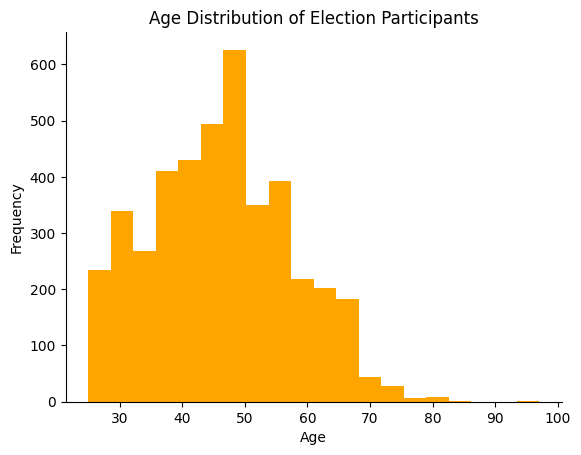

In [13]:
# Age distribution of Election Participants using barplot
election_results['age'].plot(kind='hist', bins=20, color='orange')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Age Distribution of Election Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-42382667ed08>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='party', y='age', data=election_results, palette="Set1")


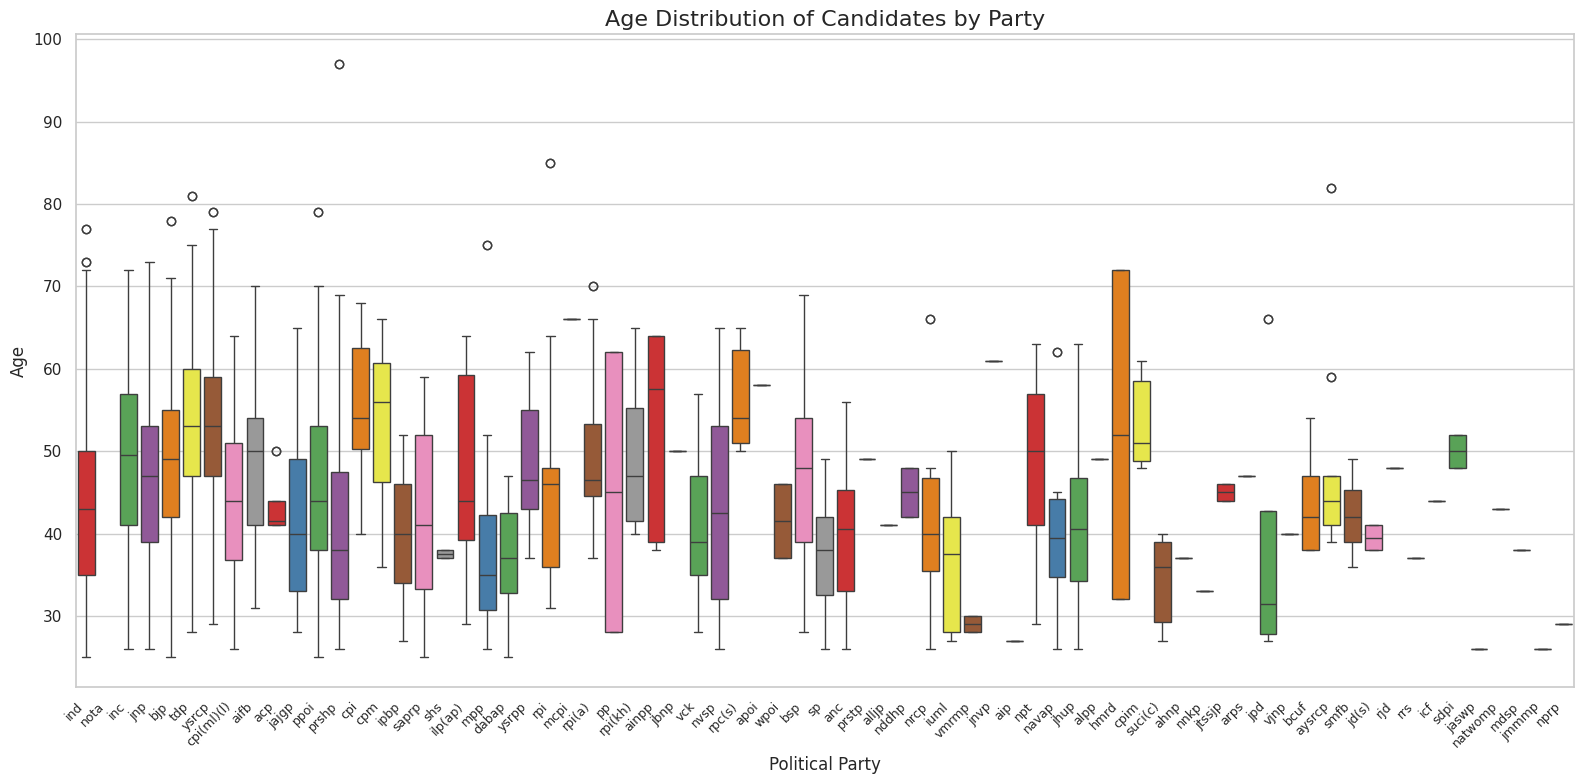

In [14]:
# Age distribution of candidates by party using boxplot.
sns.set_theme(style="whitegrid", palette="muted")

plt.figure(figsize=(16, 8))
sns.boxplot(x='party', y='age', data=election_results, palette="Set1")
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.title('Age Distribution of Candidates by Party', fontsize=16)
plt.xlabel('Political Party', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-15-792a0216e501>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


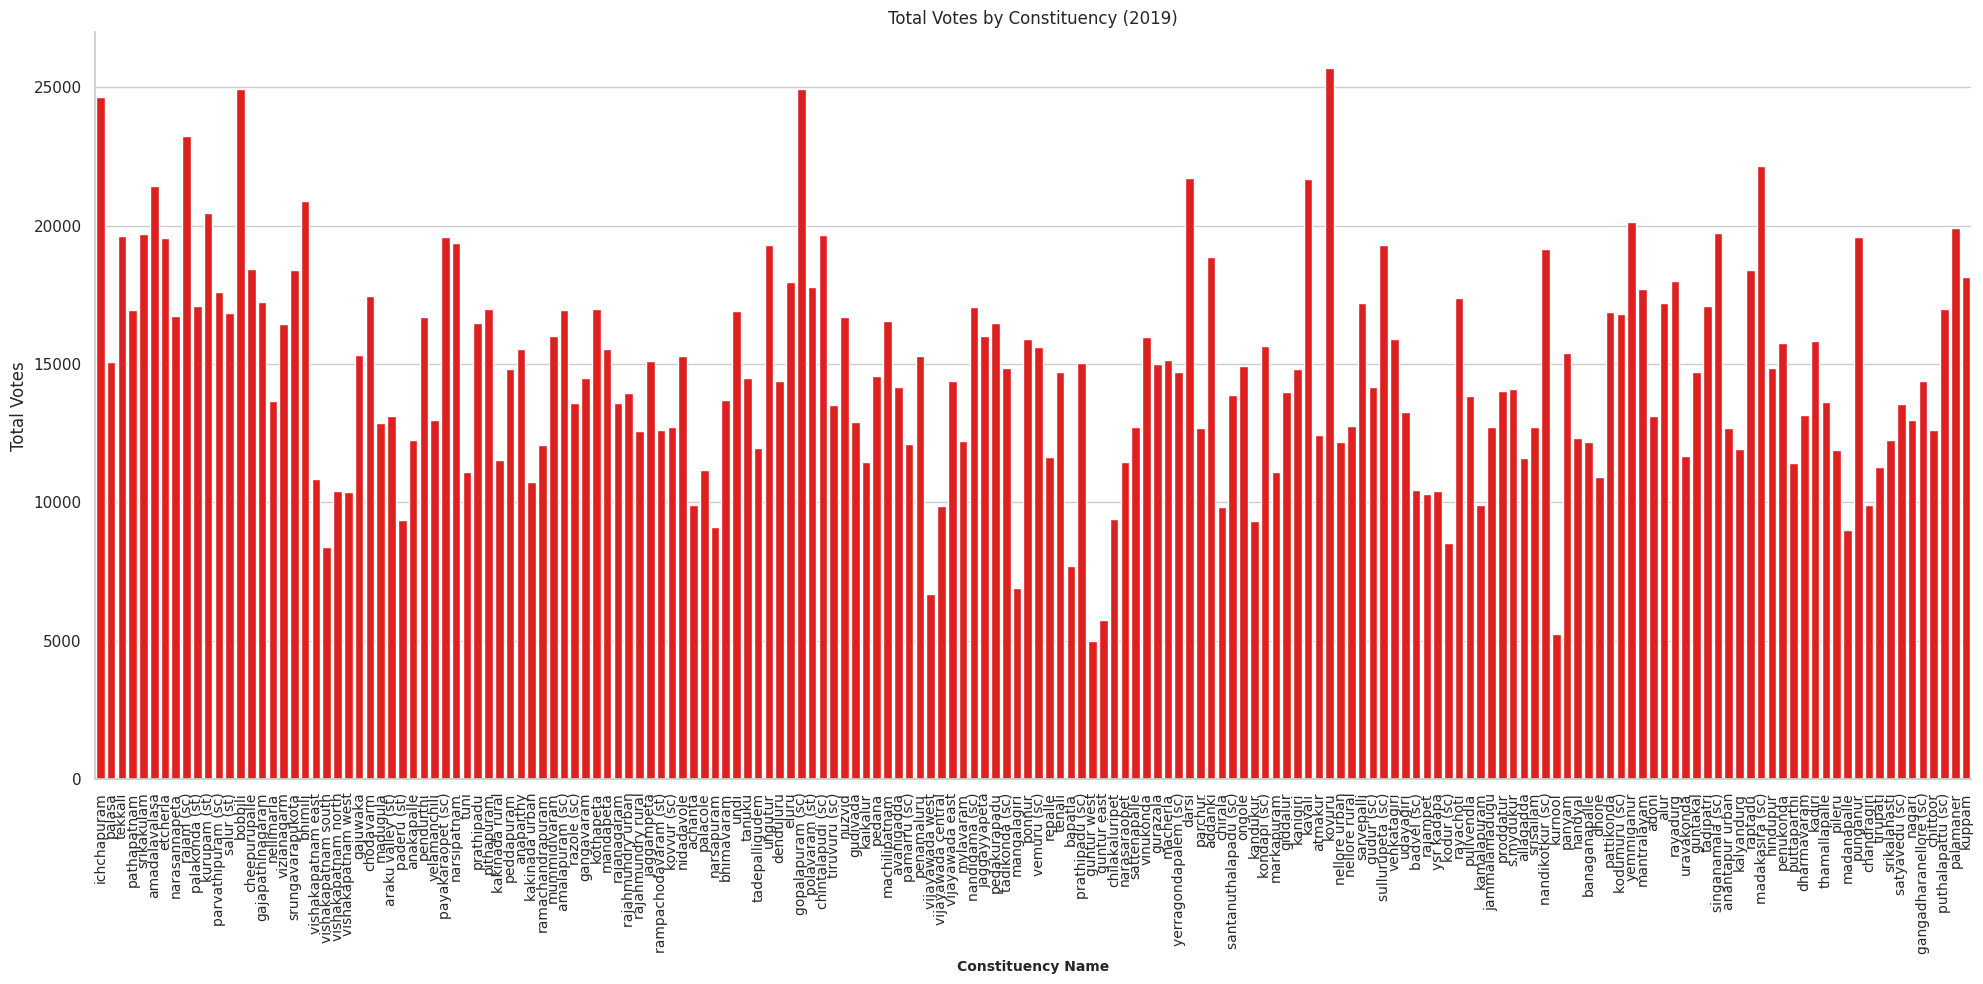

In [15]:
# Total Votes by each Constituency in 2019 using barplot

# Filter the DataFrame to include only 2019 data
election_results_2019 = election_results[election_results['year'] == 2019]

plt.figure(figsize=(20, 10))
sns.barplot(
    x='ac_name',
    y='total',
    data=election_results_2019,
    color='red',
    ci=None
)

plt.xticks(rotation=90, fontsize=10)
plt.title('Total Votes by Constituency (2019)')
plt.xlabel('Constituency Name', fontsize=10, fontweight='bold')
plt.ylabel('Total Votes')
sns.despine()
plt.tight_layout()
plt.show()

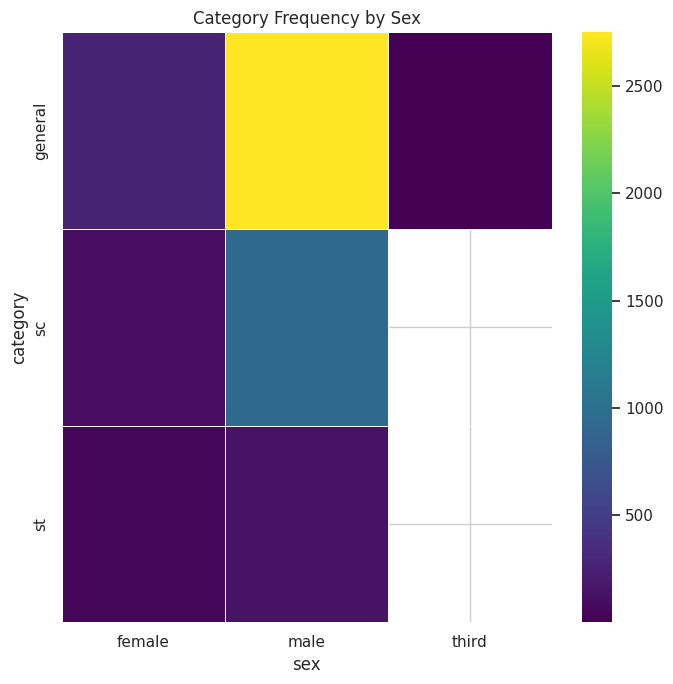

In [36]:
# Candidates category frequency by sex using a Co-relation heat map
plt.figure(figsize=(7, 7))
df_2dhist = pd.DataFrame({
    x_label: grp['category'].value_counts()
    for x_label, grp in election_results.groupby('sex')
})
sns.heatmap(df_2dhist, cmap='viridis', linewidths=0.5)
plt.title('Category Frequency by Sex')
plt.xlabel('sex')
plt.ylabel('category')
plt.tight_layout()
plt.show()

In [17]:
# unique names of constituencies in election dataset and map shapefile
unique_ac_names_election = election_results['ac_name'].unique()
unique_ac_names_andhra_map = andhra_map['assem_name'].unique()

In [18]:
print(unique_ac_names_election)

['ichchapuram' 'palasa' 'tekkali' 'pathapatnam' 'srikakulam'
 'amadalavalasa' 'etcherla' 'narasannapeta' 'rajam (sc)' 'palakonda (st)'
 'kurupam (st)' 'parvathipuram (sc)' 'salur (st)' 'bobbili'
 'cheepurupalle' 'gajapathinagaram' 'nellimarla' 'vizianagarm'
 'srungavarapukota' 'bhimili' 'vishakapatnam east' 'vishakapatnam south'
 'vishakapatnam north' 'vishakapatnam west' 'gajuwaka' 'chodavarm'
 'madugula' 'araku valley (st)' 'paderu (st)' 'anakapalle' 'pendurthi'
 'yelamanchili' 'payakaraopet (sc)' 'narsipatnam' 'tuni' 'prathipadu'
 'pithapuram' 'kakinada rural' 'peddapuram' 'anaparthy' 'kakinada urban'
 'ramachandrapuram' 'mummidivaram' 'amalapuram (sc)' 'razole (sc)'
 'gangavaram' 'kothapeta' 'mandapeta' 'rajanagaram' 'rajahmundry urban'
 'rajahmundry rural' 'jaggampeta' 'rampachodavaram (st)' 'kovvur (sc)'
 'nidadavole' 'achanta' 'palacole' 'narsapuram' 'bhimavaram' 'undi'
 'tanuku' 'tadepalligudem' 'ungutur' 'denduluru' 'eluru'
 'gopalapuram (sc)' 'polavaram (st)' 'chintalapudi (s

In [20]:
print(unique_ac_names_andhra_map)

['ichchapuram' 'palasa' 'tekkali' 'pathapatnam' 'srikakulam'
 'amadalavalasa' 'etcherla' 'narasannapeta' 'rajam (sc)' 'palakonda (st)'
 'kurupam (st)' 'parvathipuram (sc)' 'salur (st)' 'bobbili'
 'cheepurupalle' 'gajapathinagaram' 'nellimarla' 'vizianagarm'
 'srungavarapukota' 'bhimili' 'vishakapatnam east' 'vishakapatnam south'
 'vishakapatnam north' 'vishakapatnam west' 'gajuwaka' 'chodavarm'
 'madugula' 'araku valley (st)' 'paderu (st)' 'anakapalle' 'pendurthi'
 'yelamanchili' 'payakaraopet (sc)' 'narsipatnam' 'tuni' 'prathipadu'
 'pithapuram' 'kakinada rural' 'peddapuram' 'anaparthy' 'kakinada urban'
 'ramachandrapuram' 'mummidivaram' 'amalapuram (sc)' 'razole (sc)'
 'gannavaram (sc)' 'kothapeta' 'mandapeta' 'rajanagaram'
 'rajahmundry urban' 'rajahmundry rural' 'jaggampeta'
 'rampachodavaram (st)' 'kovvur (sc)' 'nidadavole' 'achanta' 'palacole'
 'narsapuram' 'bhimavaram' 'undi' 'tanuku' 'tadepalligudem' 'ungutur'
 'denduluru' 'eluru' 'gopalapuram (sc)' 'polavaram (st)'
 'chintalap

In [21]:
# mismatched constituency names from the dataset and map shapefile
mismatched_ac_names_election = set(unique_ac_names_election) - set(unique_ac_names_andhra_map)
mismatched_ac_names_andhra_map = set(unique_ac_names_andhra_map) - set(unique_ac_names_election)

In [22]:
print(sorted(mismatched_ac_names_andhra_map))

['gannavaram (sc)']


In [23]:
print(sorted(mismatched_ac_names_election))

[]


In [24]:
# Filter election_results for the year 2014
election_results_2014 = election_results[election_results['year'] == 2014]

election_results_2014.to_csv('election_results_2014.csv', index=False)


In [25]:
# Filter election_results for the year 2019
election_results_2019 = election_results[election_results['year'] == 2019]

election_results_2019.to_csv('election_results_2019.csv', index=False)


In [26]:
import matplotlib.patches as mpatches

In [27]:
winning_party = (
   election_results_2019.groupby('ac_name')
    .apply(lambda x: x.loc[x['percentage_votes_polled'].idxmax()])
    .reset_index(drop=True)
)

# Create a Dictionary for Data Filling
party_dict = pd.Series(winning_party['party'].values, index=winning_party['ac_name']).fillna('error').to_dict()

# Fill Data in GeoDataFrame
andhra_map['party'] = andhra_map['assem_name'].map(party_dict)

# Map Party Names to Colors
party_colors = {
    'tdp': 'yellow',
    'ysrcp': 'blue',
    'bjp': 'orange',
    'inc': 'green',
    'jnp': 'red',
    'ind': 'grey',
    'error': 'black' # error if no data found or shows error
}
andhra_map['color'] = andhra_map['party'].map(party_colors).fillna('black')

<ipython-input-27-fd1381df5b9f>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.loc[x['percentage_votes_polled'].idxmax()])


In [28]:
# constituency wise winning party
print(party_dict)

{'achanta': 'ysrcp', 'addanki': 'tdp', 'adoni': 'ysrcp', 'allagadda': 'ysrcp', 'alur': 'ysrcp', 'amadalavalasa': 'ysrcp', 'amalapuram (sc)': 'ysrcp', 'anakapalle': 'ysrcp', 'anantapur urban': 'ysrcp', 'anaparthy': 'ysrcp', 'araku valley (st)': 'ysrcp', 'atmakur': 'ysrcp', 'avanigadda': 'ysrcp', 'badvel (sc)': 'ysrcp', 'banaganapalle': 'ysrcp', 'bapatla': 'ysrcp', 'bhimavaram': 'ysrcp', 'bhimili': 'ysrcp', 'bobbili': 'ysrcp', 'chandragiri': 'ysrcp', 'cheepurupalle': 'ysrcp', 'chilakaluripet': 'ysrcp', 'chintalapudi (sc)': 'ysrcp', 'chirala': 'tdp', 'chittoor': 'ysrcp', 'chodavarm': 'ysrcp', 'darsi': 'ysrcp', 'denduluru': 'ysrcp', 'dharmavaram': 'ysrcp', 'dhone': 'ysrcp', 'eluru': 'ysrcp', 'etcherla': 'ysrcp', 'gajapathinagaram': 'ysrcp', 'gajuwaka': 'ysrcp', 'gangadharanellore (sc)': 'ysrcp', 'gangavaram': 'tdp', 'giddalur': 'ysrcp', 'gopalapuram (sc)': 'ysrcp', 'gudivada': 'ysrcp', 'gudur (sc)': 'ysrcp', 'guntakal': 'ysrcp', 'guntur east': 'ysrcp', 'guntur west': 'tdp', 'gurazala': 'ys

In [29]:
andhra_map.head()

,objectid,assem_name,shape_leng,type,district,naaa,st_area(shape),st_length(shape),geometry,party,color
0,1,ichchapuram,5.001582e+08,gen,srikakulam,120,0.042896,1.410057,"POLYGON ((84.57492 18.84095, 84.57491 18.84105...",tdp,yellow
1,2,palasa,5.105838e+08,gen,srikakulam,121,0.043754,1.743430,"POLYGON ((84.47398 18.98993, 84.47401 18.9901,...",ysrcp,blue
2,3,tekkali,6.512106e+08,gen,srikakulam,122,0.055752,1.598741,"POLYGON ((84.31164 18.73493, 84.31164 18.73493...",tdp,yellow
3,4,pathapatnam,8.230512e+08,gen,srikakulam,123,0.070505,2.810494,"POLYGON ((84.31164 18.73493, 84.31164 18.73493...",ysrcp,blue
4,5,srikakulam,3.182406e+08,gen,srikakulam,124,0.027214,0.893398,"POLYGON ((83.94039 18.43423, 83.93879 18.43425...",ysrcp,blue


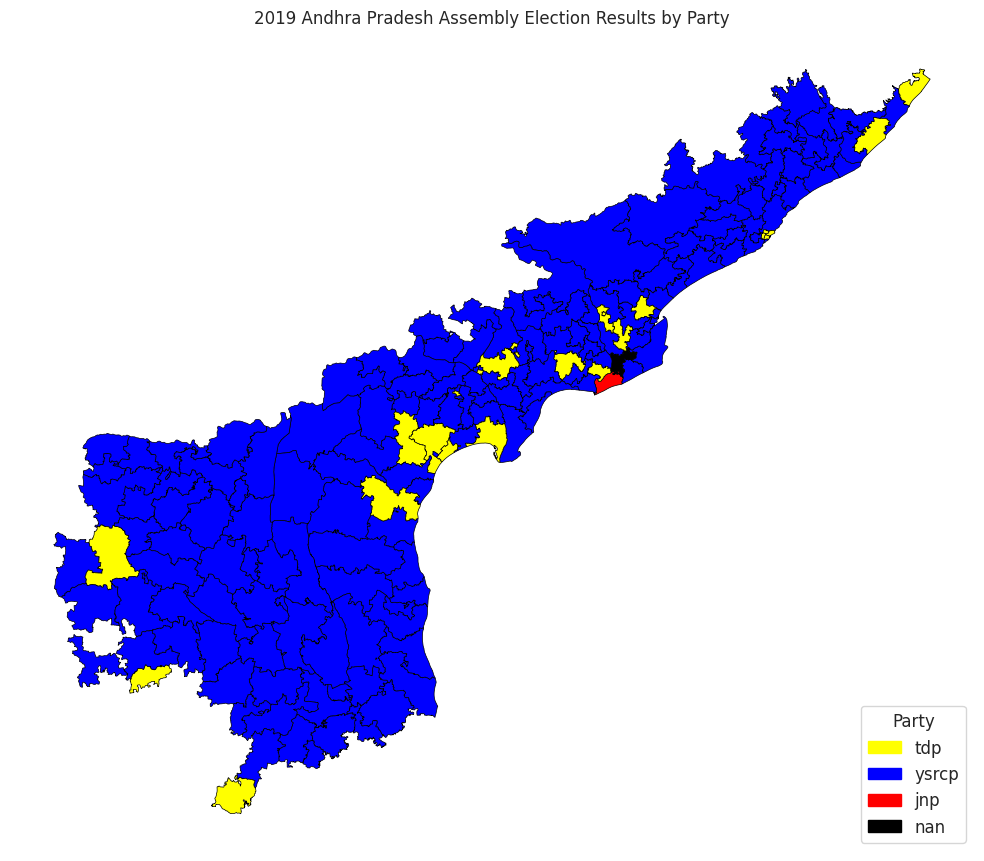

In [37]:
# Map of 2019 Andhra Pradesh Assembly Election Results by party
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
andhra_map.plot(ax=ax, color=andhra_map['color'], edgecolor='black', linewidth=0.5)

unique_parties = andhra_map[['party', 'color']].drop_duplicates()
legend_handles = [
    mpatches.Patch(color=row['color'], label=row['party']) for _, row in unique_parties.iterrows()
]

ax.legend(handles=legend_handles, title="Party", loc="lower right", fontsize='medium')
plt.title("2019 Andhra Pradesh Assembly Election Results by Party")
plt.axis('off')
plt.tight_layout()
plt.show()

# one NaN (error) which shows black in the map

In [38]:
# Load election results data
df = pd.read_csv("/content/drive/MyDrive/AP elections 2019/election_results_2019.csv")

# Find the winning party in each constituency
winners = df.loc[df.groupby("ac_name")["total"].idxmax(), "party"]

# Count constituencies won by each party
party_wins = winners.value_counts()

print("Total constituencies won by each party:")
print(party_wins)


Total constituencies won by each party:
party
ysrcp    150
tdp       23
jnp        1
Name: count, dtype: int64


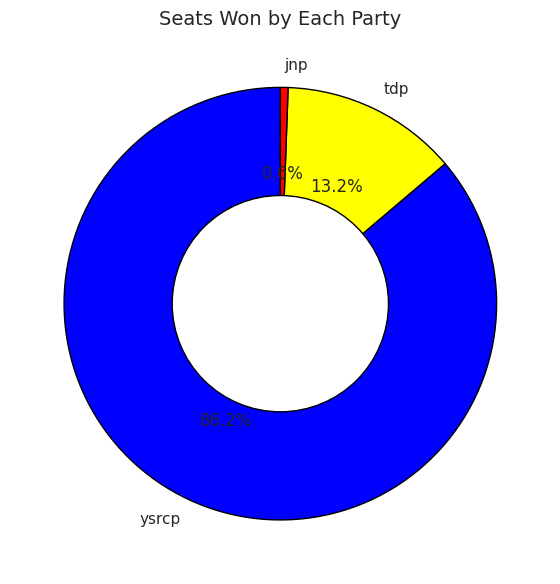

In [39]:
# Donut chart showing the percentage of seats won by each party
plt.figure(figsize=(6, 6))
colors = ['blue', 'yellow', 'red', 'orange']
party_wins.plot.pie(
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    labels=party_wins.index,
    wedgeprops={'edgecolor': 'black'}
)

# donut effect
centre_circle = plt.Circle((0, 0), 0.5, fc='white', edgecolor = 'black')
plt.gca().add_artist(centre_circle)
plt.title('Seats Won by Each Party', fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()